In [2]:
import numpy as np
from PIL import Image
import requests
import base64
from io import BytesIO
from matplotlib import pyplot as plt

In [3]:
np.convolve([0, 0, 0.3], [1, 2, 3], mode='full')

array([0. , 0. , 0.3, 0.6, 0.9])

In [4]:
res = requests.get('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.cleveland.com%2Fresizer%2F-tGiBTaHd_OnAZGJn81Ea48XIRA%3D%2F1280x0%2Fsmart%2Farc-anglerfish-arc2-prod-advancelocal.s3.amazonaws.com%2Fpublic%2FQ7VTV33G3ZAP3DAWAC6ZICM2OM.JPG&f=1&nofb=1&ipt=39b1c7b400236b4dd32447d4a56e5aeac250c18002ff9a6adfa16515a6e9183d&ipo=images')
image = Image.open(BytesIO(res.content))
image_arr = np.array(image)

In [5]:
image_arr.shape

(937, 1280, 3)

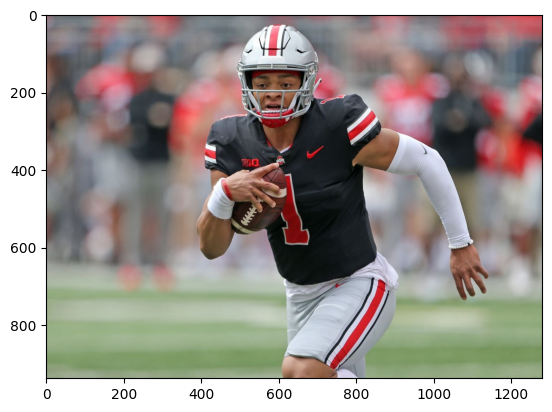

In [10]:
plt.imshow(image_arr);

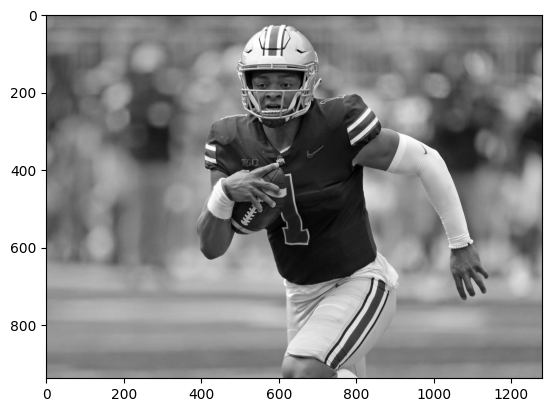

In [12]:
r_weight = 0.299
g_weight = 0.587
b_weight = 0.114

greyscaled_image = image_arr[:, :, 0]*r_weight + image_arr[:, :, 1]*g_weight + image_arr[:, :, 2]

plt.imshow(greyscaled_image, cmap='grey');

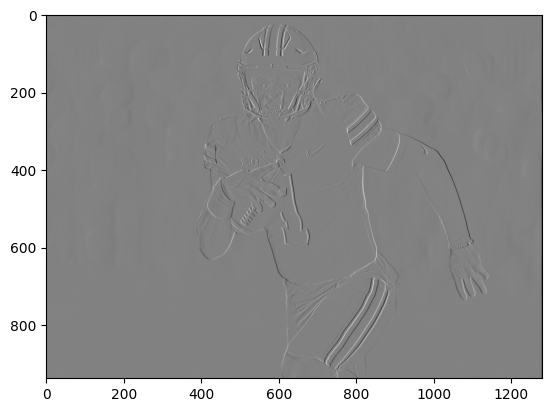

In [38]:
verticle_edges = np.zeros(greyscaled_image.shape)
horizontal_edges = np.zeros(greyscaled_image.shape).T

for i, r in enumerate(greyscaled_image):
    verticle_edges[i, :] = np.convolve([-1, 0, 1], r, 'same') 
    
for i, c in enumerate(greyscaled_image.T):
    horizontal_edges[i, :] = np.convolve([-1, 0, 1], c, 'same') 

edges = verticle_edges + horizontal_edges.T

plt.imshow(verticle_edges, cmap='binary');

In [40]:
np.array([[
    1, 
]])

(937,)